# Chemical Reaction Engineering - Assignment 1

## Instructions 

Please use Python to solve the exercises below. 

Your should hand in a jupyter notebook with your answers.
When handing in, you are welcome to submit additional material you may have used, such as a scan of the paper to solve parts of the equations, Word and PDF documents and similar.

The exercises sum up to a total of 12 points, but you only need **10 points** to get top marks.
Please note that there are **two optional exercises** (for a total of 12 points). 
Consider solving the optional exercises if you are unsure about some of the others.

You will also get partial points for trying to solve the different exercises.

## Assignment 1

In your company, you need to evaluate the composition of the feed stream (containing only A and B) of an isothermal gas-phase reaction expressed as:

$A+\frac{1}{12}B→\frac{1}{6}C+\frac{1}{2}D$

1. First, set up the stoichiometric table for the reaction for a flow reactor with constant pressure **(2 points)**. Afterwards, write the concentrations of A, B, C and D as function of the conversion X **(1 point)**.


In [1]:
# Set up the stoichiometric table for the reaction for a flow reactor with constant pressure

# Your code here

<div>
<img src="exercise1.png" width="750"/>
</div>

In [2]:
# Write the concentrations of A, B, C and D as function of the conversion X 

CA = f'C_A0'

During a laboratory experiment you measure in a batch reactor with constant volume:
    
| $$ Time (h) $$|  $$ Cc (mol \cdot m^{-3}) $$ |
| :------- | :------------------------- |
| 0 | 0 |
|2|2,5|
|4|3,13|
|6|3,41|
|8|3,57|
|10|3,68|
|12|3,75|
|14|3,81|
|16|3,85|
|18|3,88|
|20|3,91|

2. First of all, create a `pandas dataframe` of the data in the table below **(1 point)**.

In [3]:
# Create pandas dataframe
import pandas as pd

df = pd.DataFrame()
df['Time'] = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
df['Cc'] = [0, 2.5, 3.13, 3.41, 3.57, 3.68, 3.75, 3.81, 3.85, 3.88, 3.91]

3. Calculate the rate of the reaction, which follows the expression:

$-\frac{dC_A}{dt} = k{C_{A}}^n$

To do so, consider that this data is obtained with a constant volume reactor and the initial concentration of $C_A$ is 25 $mol \cdot m^{-3}$. 
Choose between using the differential or the integral method **(2,5 points)**.

**Optional**: Backup your answer with the other method **(1 point)**.

In [4]:
# Calculate the rate of the reaction
import numpy as np

def calculate_CA(C_A0, Cc):
    C_A = C_A0-(6*Cc)
    return C_A

df['Ca'] = calculate_CA(25, df['Cc'])
df['ln(Ca)'] = round(np.log(df['Ca']), 2)

x = [a - b for a, b in zip(df['Ca'].iloc[1:], df['Ca'][:-1])]



print(len(x))
t = [a - b for a, b in zip(df['Time'].iloc[1:], df['Time'][:-1])]

df['-delta Ca/delta t'] = [None] + [round(-(i/j), 2) for i, j in zip(x, t)]
df['ln(-delta Ca/delta t)'] = round(np.log(df['-delta Ca/delta t']), 2)

10


In [27]:
df

,Time,Cc,Ca,ln(Ca),-delta Ca/delta t,ln(-delta Ca/delta t),1/Ca,Cb,Cd
0,0,0.00,25.00,3.22,NaN,NaN,0.04,2.08,0.00
1,2,2.50,10.00,2.30,7.50,2.01,0.10,0.83,7.50
2,4,3.13,6.22,1.83,1.89,0.64,0.16,0.52,9.39
3,6,3.41,4.54,1.51,0.84,-0.17,0.22,0.38,10.23
4,8,3.57,3.58,1.28,0.48,-0.73,0.28,0.30,10.71
5,10,3.68,2.92,1.07,0.33,-1.11,0.34,0.24,11.04
6,12,3.75,2.50,0.92,0.21,-1.56,0.40,0.21,11.25
7,14,3.81,2.14,0.76,0.18,-1.71,0.47,0.18,11.43
8,16,3.85,1.90,0.64,0.12,-2.12,0.53,0.16,11.55
9,18,3.88,1.72,0.54,0.09,-2.41,0.58,0.14,11.64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\fiacac\AppData\Local\Temp/ipykernel_22640/2951071392.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


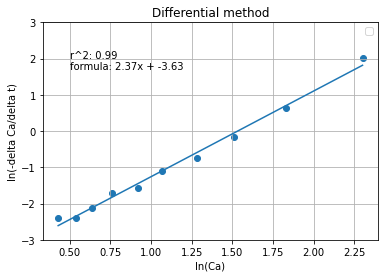

In [6]:
import matplotlib.pyplot as plt
import scipy
from scipy import stats

m, b, r_value, p_value, std_err = scipy.stats.linregress(df['ln(Ca)'].iloc[1:], df['ln(-delta Ca/delta t)'].iloc[1:])

fig, ax = plt.subplots()
ax.scatter(df['ln(Ca)'].iloc[1:], df['ln(-delta Ca/delta t)'].iloc[1:])
ax.plot(df['ln(Ca)'].iloc[1:], m*df['ln(Ca)'].iloc[1:] + b)
ax.annotate('r^2: ' + str("{:.2f}".format(r_value**2)), xy=(0.5, 2))
ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(0.5,1.7))
plt.title('Differential method')
plt.xlabel('ln(Ca)')
plt.ylabel('ln(-delta Ca/delta t)')
plt.legend()
plt.grid()
plt.ylim([-3, 3])
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\fiacac\AppData\Local\Temp/ipykernel_22640/3967210108.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


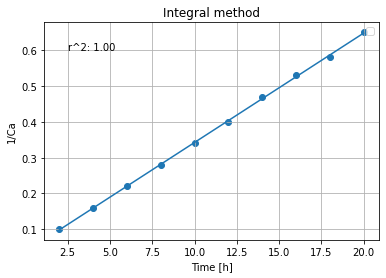

In [7]:
df['1/Ca'] = round(1/df['Ca'], 2)

m, b, r_value, p_value, std_err = scipy.stats.linregress(df['Time'].iloc[1:], df['1/Ca'].iloc[1:])

fig, ax = plt.subplots()
ax.scatter(df['Time'].iloc[1:], df['1/Ca'].iloc[1:])
ax.plot(df['Time'].iloc[1:], m*df['Time'].iloc[1:] + b)
ax.annotate('r^2: ' + str("{:.2f}".format(r_value**2)), xy=(2.5, 0.6))
ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(1950,18500))
plt.title('Integral method')
plt.xlabel('Time [h]')
plt.ylabel('1/Ca')
plt.legend()
plt.grid()
#plt.ylim([-3, 3])
fig.show()

4. Plot the concentrations of A, B, C and D versus time. Explain the assumption you have made **(1,5 point)**.

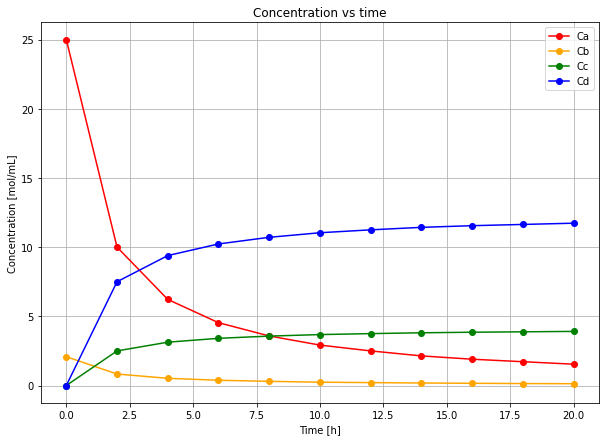

In [8]:
# Plot the concentrations of A, B, C and D versus time

df['Cb'] = round(df['Ca']*1/12, 2)
df['Cd'] = round(df['Cc']/(1/6)*(1/2), 2)

plt.figure(figsize=(10,7))
plt.plot(df['Time'], df['Ca'], color='red', label='Ca', marker='o')
plt.plot(df['Time'], df['Cb'], color='orange', label='Cb', marker='o')
plt.plot(df['Time'], df['Cc'], color='green', label='Cc', marker='o')
plt.plot(df['Time'], df['Cd'], color='blue', label='Cd', marker='o')
plt.title('Concentration vs time')
plt.xlabel('Time [h]')
plt.ylabel('Concentration [mol/mL]')
plt.grid()
plt.legend()

5. Finally, correlate the rate constant k with the temperature through the Arrhenius expression. Calculate the activation energy **(0,75 point)** and the Arrhenius constant **(0,75 point)** using the data below:

| $$ Temperature (^\circ C) $$ |  $$ {k (m^3 \cdot mol^{-1} \cdot h^{-1})} $$ |
| :------- | :------------------------- |
| 25 | 0,02764 |
|30|0,03548|
|35|0,04519|
|45|0,07165|

*Hint*: $ R = 8.314 J \cdot mol^{-1}·K^{-1} $

Plot the relation between the rate constant k and the temperature **(0,5 point)**.

In [9]:
# Calculate the activation energy

def calculate_k(A, Ea, R, T):
    return A* np.exp(-EA/(R*T))

def calculate_ln_k(A, Ea, R, T):
    return np.log(A)-(Ea/R)*1/T

df_arrhenius = pd.DataFrame()
df_arrhenius['T_C'] = [25, 30, 35, 45]
df_arrhenius['k'] = [0.02764, 0.03548, 0.04519, 0.07165]
df_arrhenius['T_K'] = round(273.15 + df_arrhenius['T_C'])
df_arrhenius['1/T'] = 1/df_arrhenius['T_K']
df_arrhenius['ln(k)'] = np.log(df_arrhenius['k'])

df_arrhenius

,T_C,k,T_K,1/T,ln(k)
0,25,0.02764,298.0,0.003356,-3.588491
1,30,0.03548,303.0,0.003300,-3.338786
2,35,0.04519,308.0,0.003247,-3.096879
3,45,0.07165,318.0,0.003145,-2.635962


 
-4514 x + 11.56
-37525.60359505965
104560.4590263023


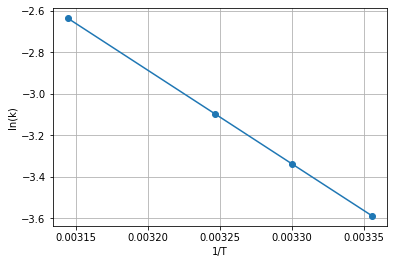

In [26]:
plt.plot(df_arrhenius['1/T'], df_arrhenius['ln(k)'], marker='o')
z = np.polyfit(df_arrhenius['1/T'].tolist(), df_arrhenius['ln(k)'].tolist(), 1)
p = np.poly1d(z)
ER = z[0]
print(p)
Ea = z[0]*R
print(Ea)
A = np.exp(z[1])
print(A)
plt.grid()
plt.xlabel('1/T')
plt.ylabel('ln(k)')
plt.show()

In [24]:
# Calculate the Arrhenius constant
k = 0.02764
Ea = 4513.5*R 
print(Ea)
R = 8.314
T = 25+273
A = k/(np.exp(-Ea/(R*T)))
A

37525.239


104556.39545877262

In [28]:
np.exp(-3.376)

0.034183917296711934

In [ ]:
# Plot the relation between the rate constant k and the temperature

# Your code here

**Optional**: Write the complete kinetic expression written with the concentration of $C_A$ expressed with help of the initial concentration $C_{A0}$ and X **(1 point)**.


In [ ]:
# Write the complete kinetic expression

# Your code here